In [ ]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

C:\Users\dilsh\AppData\Local\Temp\ipykernel_25856\2351309042.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Data Preparation and Preporcessing

In [2]:
df = pd.read_csv("data.csv")
df.head(10)

C:\Users\dilsh\AppData\Local\Temp\ipykernel_25856\3622707691.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


## Describe the dataset

In [3]:
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columns")

The Dataset consists of:  318477  rows and  13  columns


In [4]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [5]:
df.count()

Id                   318477
Title                318477
Company              306473
Date                 318477
Location             197229
Area                 122658
Classification       197229
SubClassification    197229
Requirement          318470
FullDescription      302302
LowestSalary         318477
HighestSalary        318477
JobType              302379
dtype: int64

## Preparation and Prepocressing
- Remove unwanted characters
- Fix data types
- Find average salary
- Check of dups and null

In [6]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Id"] = pd.to_numeric(df["Id"])
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [7]:
df = df.assign(AverageSalary=(df['HighestSalary']+ df['LowestSalary'])/2)
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN,15.0
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,15.0
8,37404301,Telemarketer,Reventon Investments,2018-10-07,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN,15.0
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN,15.0


In [ ]:
df.isnull().sum()

: 

In [9]:
df[df.duplicated()].shape[0] 
#df.drop_duplicates(inplace=True)
#should remove or not

108

# Data Analysis and Interpretation
## Study the job metadata
- Classification and the respected sub-classification of each job (assuming text)
- Location of jobs (graph of amount of jobs in locations)
- Range of salaries for each job (Count of job salaries) ? - what does each job mean?

In [10]:
#Classification 
df["Classification"].unique()

array(['Retail & Consumer Products', 'Call Centre & Customer Service',
       'Hospitality & Tourism', 'Banking & Financial Services',
       'Manufacturing, Transport & Logistics', 'Sales',
       'Administration & Office Support', 'Trades & Services',
       'Accounting', 'Real Estate & Property', 'Healthcare & Medical',
       'Marketing & Communications', 'Government & Defence',
       'Information & Communication Technology', 'Education & Training',
       'Community Services & Development', 'Mining, Resources & Energy',
       'Human Resources & Recruitment', 'Insurance & Superannuation',
       'Engineering', 'CEO & General Management', 'Design & Architecture',
       'Legal', 'Construction', 'Sport & Recreation',
       'Science & Technology', 'Advertising, Arts & Media',
       'Farming, Animals & Conservation', 'Self Employment',
       'Consulting & Strategy', nan], dtype=object)

In [11]:
#Sub-classification
df["SubClassification"].unique()

array(['Retail Assistants', 'Sales - Inbound',
       'Customer Service - Call Centre', 'Waiting Staff',
       'Sales - Outbound', 'Kitchen & Sandwich Hands',
       'Banking - Retail/Branch', 'Customer Service - Customer Facing',
       'Bar & Beverage Staff', 'Housekeeping', 'Other',
       'Assembly & Process Work', 'Purchasing, Procurement & Inventory',
       'Sales Representatives/Consultants', 'Chefs/Cooks',
       'Records Management & Document Control', 'Analysis & Reporting',
       'Office Management', 'Warehousing, Storage & Distribution',
       'Security Services', 'Administrative Assistants',
       'Management - Store', 'Contracts Administration', 'Road Transport',
       'Front Office & Guest Services', 'PA, EA & Secretarial',
       'Team Leaders/Supervisors', 'Cleaning Services',
       'Bookkeeping & Small Practice Accounting',
       'Commercial Sales, Leasing & Property Mgmt',
       'New Business Development', 'Management - Department/Assistant',
       'Hair & 

In [12]:
#Locations of jobs
df["Location"].unique()

array(['Sydney', 'Richmond & Hawkesbury', 'Brisbane',
       'Gosford & Central Coast', 'Adelaide', 'Melbourne', 'Perth',
       'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast',
       'West Gippsland & Latrobe Valley', 'Hervey Bay & Fraser Coast',
       'South West Coast VIC', 'Mornington Peninsula & Bass Coast',
       'Port Hedland, Karratha & Pilbara', 'Ballarat & Central Highlands',
       'Bendigo, Goldfields & Macedon Ranges',
       'Yarra Valley & High Country', 'Coffs Harbour & North Coast',
       'Newcastle, Maitland & Hunter', 'Tumut, Snowy & Monaro', 'Darwin',
       'Toowoomba & Darling Downs', 'ACT',
       'Wollongong, Illawarra & South Coast',
       'Port Macquarie & Mid North Coast',
       'Southern Highlands & Tablelands', 'Albury Area',
       'Yorke Peninsula & Clare Valley',
       'Kalgoorlie, Goldfields & Esperance',
       'Far West & North Central NSW', 'Cairns & Far North',
       'Wagga Wagga & Riverina', 'Lismore & Far North Coast',
       'Alice 

In [13]:
#Ranges of salaries
df["AverageSalary"].unique()

array([ 15. ,  35. ,  45. ,  55. ,  65. ,  75. ,  90. , 110. , 135. ,
       175. , 599.5])

## Study the market of locations
- Amount of jobs in a city
- Find count of sectors and group by top 15 and maybe bottom 15 

In [14]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


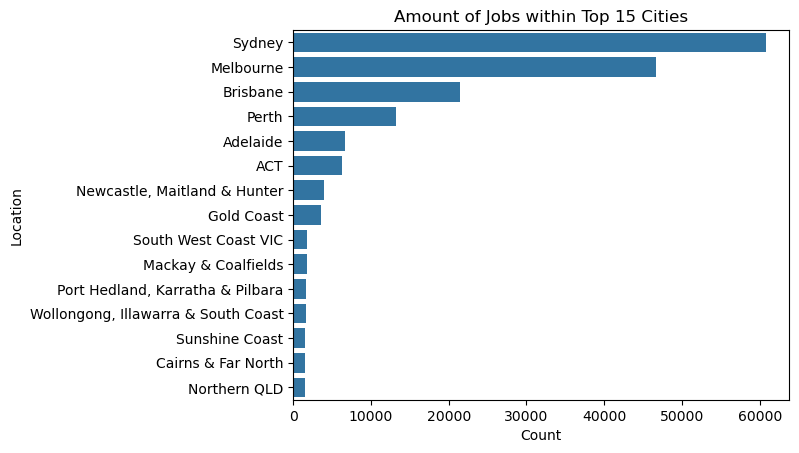

In [15]:
locationTop15Df = locationDf[:15].copy()
plt.title("Amount of Jobs within Top 15 Cities")
sns.barplot(data=locationTop15Df, y="Location", x="Count")
plt.show()

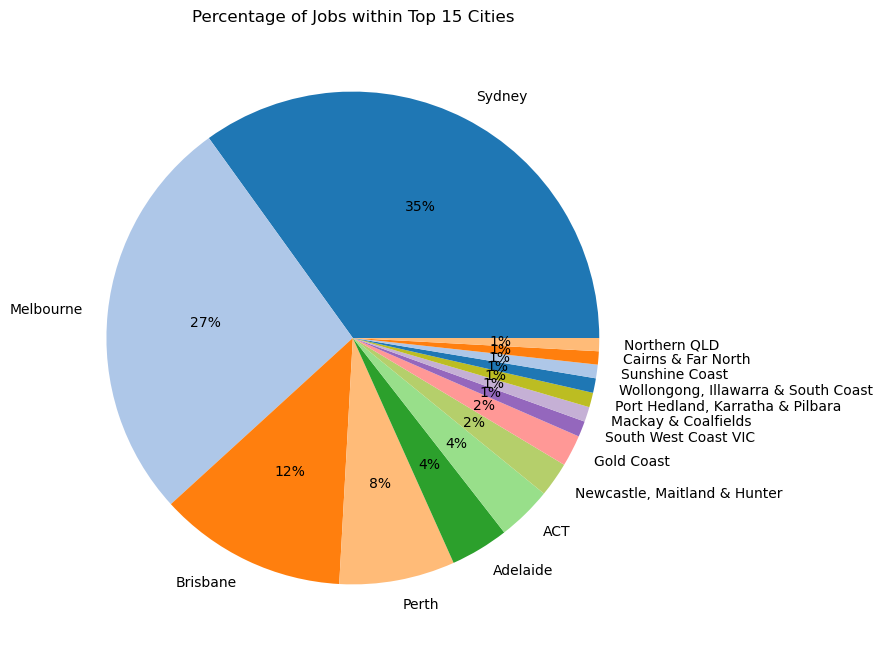

In [16]:
plt.figure(figsize=(8,8))
plt.title("Percentage of Jobs within Top 15 Cities")
plt.pie(locationTop15Df["Count"], labels=locationTop15Df['Location'], colors=colors, autopct='%.0f%%')
plt.show()

In [17]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
classificationDf

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Classification,Count
Classification,,,,,,,,,,,,,,,
Information & Communication Technology,22796,22796,22447,22796,22796,16090,22796,22796,21162,22796,22796,21163,22796,Information & Communication Technology,22796
Trades & Services,17976,17976,16500,17976,17976,9671,17976,17976,17125,17976,17976,17126,17976,Trades & Services,17976
Healthcare & Medical,17085,17085,16390,17085,17085,7961,17085,17085,16380,17085,17085,16383,17085,Healthcare & Medical,17085
Hospitality & Tourism,15523,15523,14890,15523,15523,9642,15523,15523,14294,15523,15523,14298,15523,Hospitality & Tourism,15523
"Manufacturing, Transport & Logistics",12376,12376,11465,12376,12376,8545,12376,12376,11752,12376,12376,11754,12376,"Manufacturing, Transport & Logistics",12376
Administration & Office Support,10020,10020,9534,10020,10020,6843,10020,10020,9215,10020,10020,9215,10020,Administration & Office Support,10020
Accounting,9368,9368,9056,9368,9368,7308,9368,9368,8760,9368,9368,8760,9368,Accounting,9368
Education & Training,9280,9280,9037,9280,9280,5868,9280,9280,8714,9280,9280,8718,9280,Education & Training,9280
Construction,8372,8372,8042,8372,8372,5057,8372,8372,8022,8372,8372,8023,8372,Construction,8372


In [18]:
grouped = df.groupby(['Classification', 'Location']).size().reset_index(name='Count')
class_df = grouped.pivot(index='Classification', columns='Location', values='Count').fillna(0).astype(int)
class_df['Total'] = class_df.sum(axis=1)
class_df = class_df.sort_values(by='Total', ascending=False)
class_df = class_df.drop(columns='Total')
class_df.head(10)

Location,ACT,Adelaide,Adelaide Hills & Barossa,Albany & Great Southern,Albury Area,Alice Springs & Central Australia,Bairnsdale & Gippsland,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",Blue Mountains & Central West,...,Tamworth & North West NSW,Toowoomba & Darling Downs,"Tumut, Snowy & Monaro",Wagga Wagga & Riverina,West Gippsland & Latrobe Valley,Western QLD,Whyalla & Eyre Peninsula,"Wollongong, Illawarra & South Coast",Yarra Valley & High Country,Yorke Peninsula & Clare Valley
Classification,,,,,,,,,,,,,,,,,,,,,
Information & Communication Technology,2057,547,1,1,14,4,10,13,20,26,...,11,19,2,12,12,5,0,39,3,0
Trades & Services,367,819,24,16,51,23,38,64,94,136,...,79,198,9,100,50,55,40,191,61,17
Healthcare & Medical,375,786,27,24,89,59,68,111,146,122,...,113,171,15,206,110,107,23,273,59,19
Hospitality & Tourism,326,499,33,5,38,27,17,48,128,93,...,31,58,3,58,59,21,6,188,135,8
"Manufacturing, Transport & Logistics",170,550,26,10,41,11,22,27,57,49,...,37,87,3,42,33,14,9,76,25,3
Administration & Office Support,319,378,15,4,18,7,11,22,37,51,...,24,82,4,45,30,24,8,71,12,5
Accounting,180,269,6,4,11,3,5,12,12,25,...,15,35,1,18,2,10,2,41,6,0
Education & Training,288,285,14,1,25,21,71,62,63,44,...,25,87,2,37,81,32,5,56,59,2
Construction,212,240,3,5,6,4,5,19,4,47,...,11,54,4,20,14,9,8,65,9,2


In [19]:
check = class_df.reset_index()
check.index = check['Classification']
check

Location,Classification,ACT,Adelaide,Adelaide Hills & Barossa,Albany & Great Southern,Albury Area,Alice Springs & Central Australia,Bairnsdale & Gippsland,Ballarat & Central Highlands,"Bendigo, Goldfields & Macedon Ranges",...,Tamworth & North West NSW,Toowoomba & Darling Downs,"Tumut, Snowy & Monaro",Wagga Wagga & Riverina,West Gippsland & Latrobe Valley,Western QLD,Whyalla & Eyre Peninsula,"Wollongong, Illawarra & South Coast",Yarra Valley & High Country,Yorke Peninsula & Clare Valley
Classification,,,,,,,,,,,,,,,,,,,,,
Information & Communication Technology,Information & Communication Technology,2057,547,1,1,14,4,10,13,20,...,11,19,2,12,12,5,0,39,3,0
Trades & Services,Trades & Services,367,819,24,16,51,23,38,64,94,...,79,198,9,100,50,55,40,191,61,17
Healthcare & Medical,Healthcare & Medical,375,786,27,24,89,59,68,111,146,...,113,171,15,206,110,107,23,273,59,19
Hospitality & Tourism,Hospitality & Tourism,326,499,33,5,38,27,17,48,128,...,31,58,3,58,59,21,6,188,135,8
"Manufacturing, Transport & Logistics","Manufacturing, Transport & Logistics",170,550,26,10,41,11,22,27,57,...,37,87,3,42,33,14,9,76,25,3
Administration & Office Support,Administration & Office Support,319,378,15,4,18,7,11,22,37,...,24,82,4,45,30,24,8,71,12,5
Accounting,Accounting,180,269,6,4,11,3,5,12,12,...,15,35,1,18,2,10,2,41,6,0
Education & Training,Education & Training,288,285,14,1,25,21,71,62,63,...,25,87,2,37,81,32,5,56,59,2
Construction,Construction,212,240,3,5,6,4,5,19,4,...,11,54,4,20,14,9,8,65,9,2


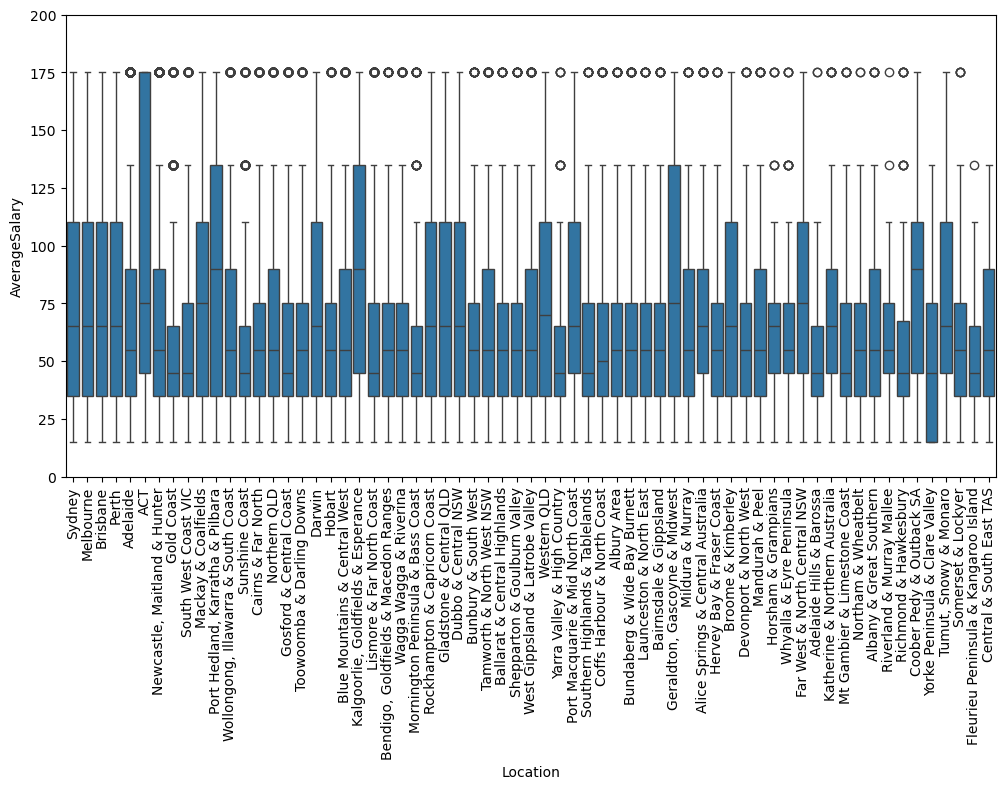

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Location", y="AverageSalary", order=locationDf["Location"])
#lowest or average
plt.ylim(0, 200)
plt.xticks(rotation=90)
plt.show()

In [45]:
dateDf = df['Date'].value_counts().reset_index()
dateDf.columns = ["Date", "Count"]
dateDf = dateDf.sort_values(by="Date")
dateDf = dateDf.reset_index(drop=True)
dateDf

,Date,Count
0,2018-10-01,1023
1,2018-10-02,1980
2,2018-10-03,4945
3,2018-10-04,8506
4,2018-10-05,5711
...,...,...
158,2019-03-09,1
159,2019-03-10,2
160,2019-03-11,17
161,2019-03-12,39


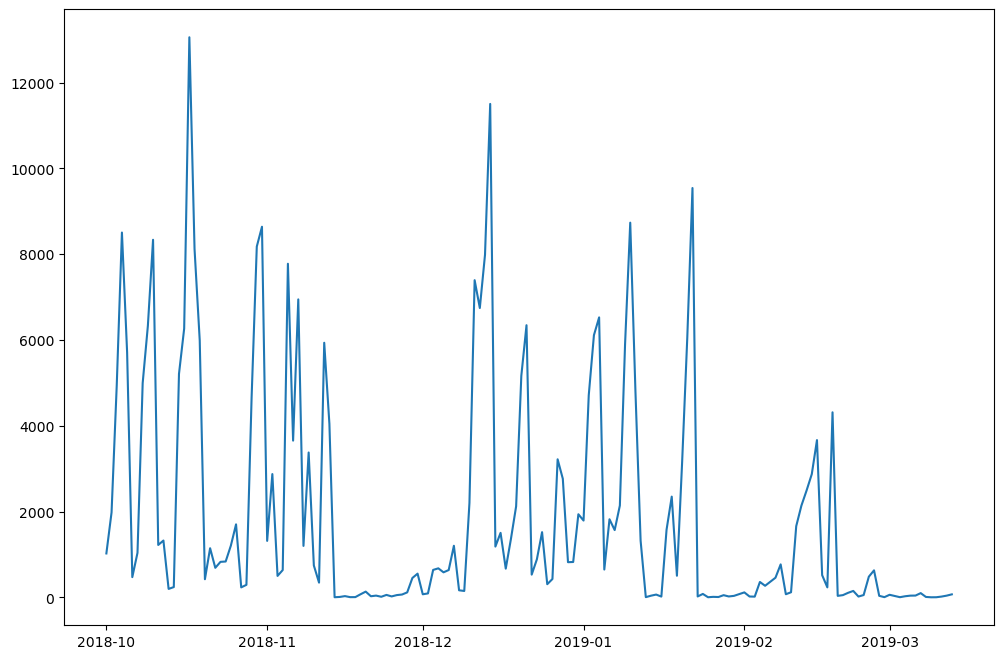

In [49]:
period = dateDf[(dateDf["Date"] >= "2018-01-01") & (dateDf["Date"] <= "2020-01-01")]
period
plt.figure(figsize=(12,8))
plt.plot(period["Date"], period["Count"])

<Axes: xlabel='Count', ylabel='Classification'>

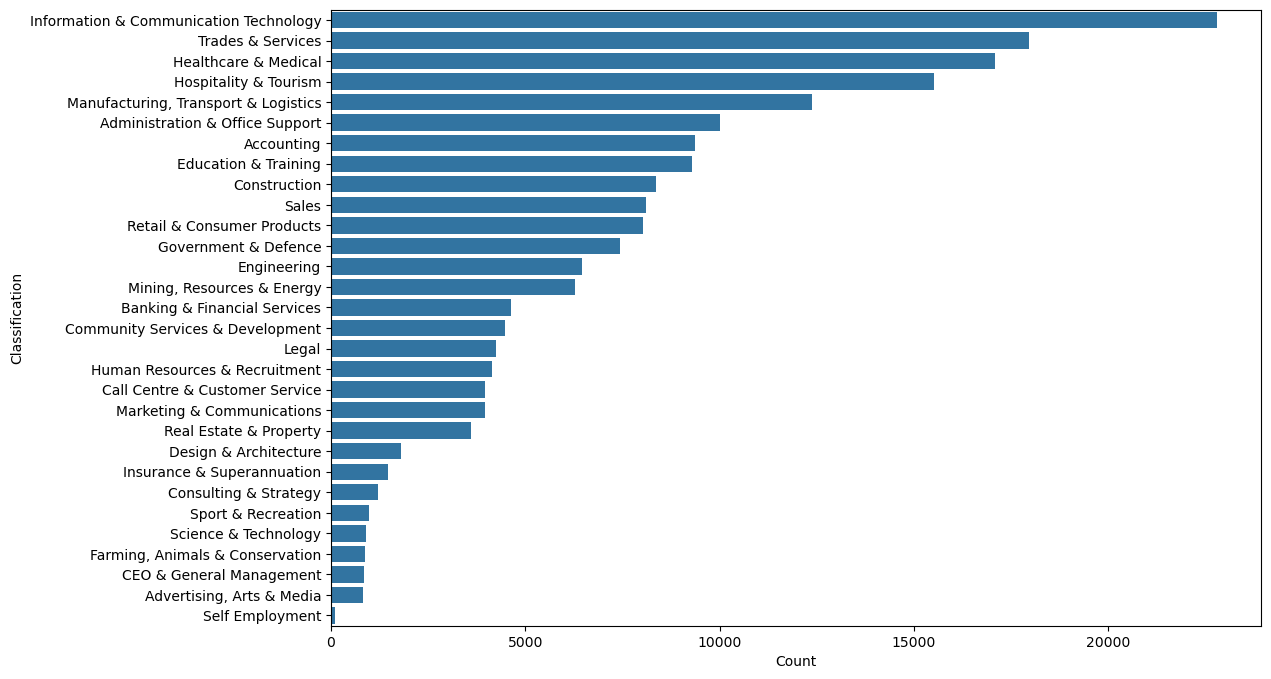

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(classificationDf, x="Count", y="Classification")


In [64]:
infoclassdf = df[df["Classification"] == "Information & Communication Technology"]
subDf = infoclassdf['SubClassification'].value_counts().reset_index()
subDf.columns = ["SubClassification", "Count"]
subDf


,SubClassification,Count
0,Developers/Programmers,4211
1,Business/Systems Analysts,2986
2,Programme & Project Management,2413
3,Architects,1548
4,Engineering - Software,1437
5,Help Desk & IT Support,1374
6,Networks & Systems Administration,1194
7,Consultants,1149
8,Other,997
9,Testing & Quality Assurance,831


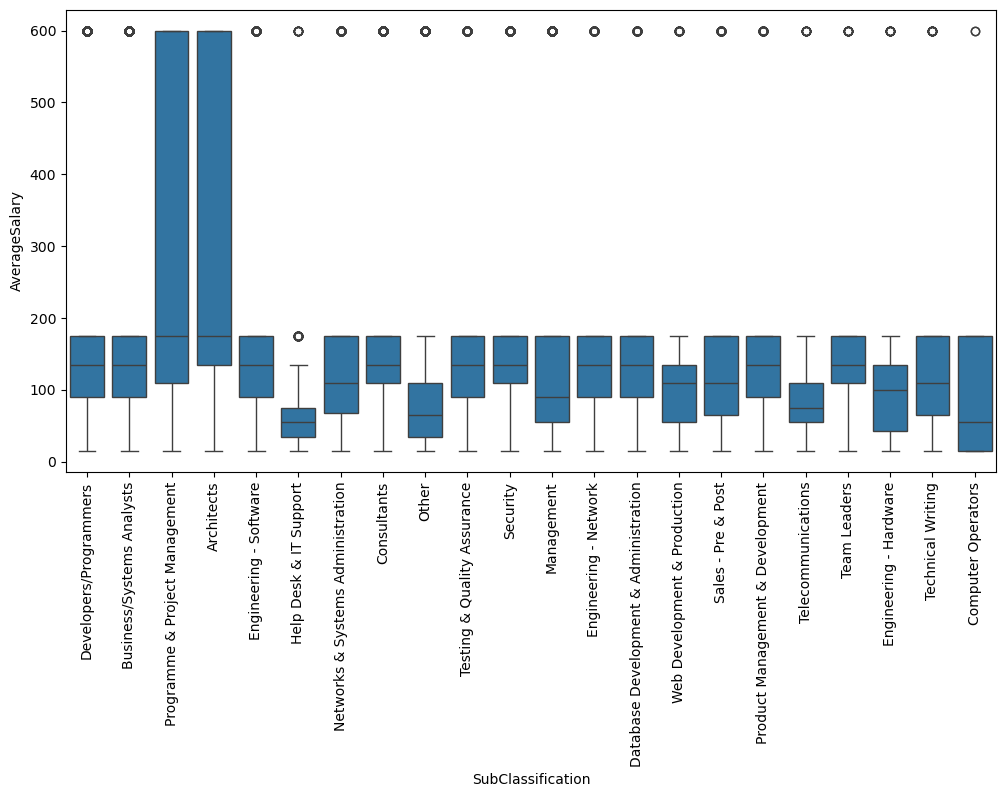

In [55]:
subclassdf = df[df["Classification"] == "Information & Communication Technology"]
ordersubclass = subclassdf["SubClassification"].value_counts().index
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="SubClassification", y="AverageSalary", order=ordersubclass)
plt.xticks(rotation=90)
plt.show()